In [7]:
import os
import sys
pdir = os.path.dirname(os.getcwd())
sys.path.append(pdir)

import numpy as np
import torch
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from torch.utils.data import Dataset, DataLoader

import utils
from simpleview_pytorch import SimpleView

In [8]:
cloud = utils.pc_from_txt("../data/treesXYZ/alt01_2.txt")
cloud = utils.center_and_scale(cloud)

In [9]:
if None:
    %%time
    sample_images = utils.get_depth_images_from_cloud(cloud, image_dim=256, use_hard_min=True)
    utils.plot_depth_images(sample_images)

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

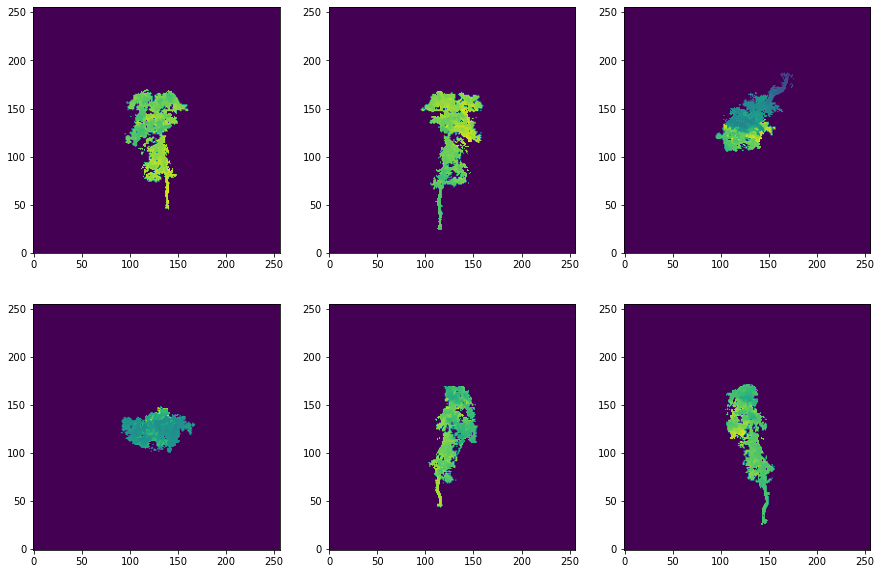

In [12]:
%%time
sample_images = utils.get_depth_images_from_cloud(cloud, image_dim=256, use_hard_min=False)
fig, ax = utils.plot_depth_images(sample_images, nrows=2)

fig.savefig('tree_projections.png', bbox_inches='tight')

In [2]:
%%time
metadata_file = "../data/treesXYZ/meta/META.csv"
data_dir = "../data/treesXYZ/"

image_dim=256
trees_dataset = utils.TreeSpeciesPointDataset(data_dir=data_dir, 
                                         metadata_file=metadata_file,
                                         )

params = {
    "image_dim":256,
    "camera_fov_deg":90,
    "f":1,
    "camera_dist":1.4,
    "soft_min_k":50,
    "transforms":['rotation','translation','jitter'],
    "min_rotation":0,
    "max_rotation":2*np.pi,
    "min_translation":0,
    "max_translation":0.5,
    "jitter_std":3e-4
}

trees_dataset.set_params(**params)

100%|██████████| 2485/2485 [47:42<00:00,  1.15s/it]  

CPU times: user 47min 32s, sys: 7.72 s, total: 47min 40s
Wall time: 47min 42s


In [3]:
torch.save(trees_dataset, "tree_points.pt")

(<Figure size 2160x360 with 6 Axes>,
 array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>], dtype=object))

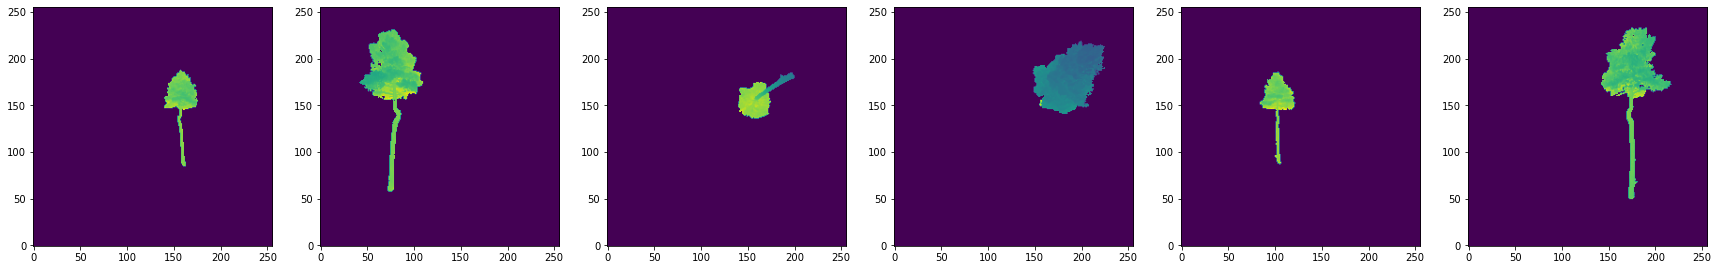

In [34]:
utils.plot_depth_images(trees_dataset.__getitem__(2)['depth_images'])